**Importing the required libraries**

In [33]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

**Load the dataset**


In [34]:
import os
url = "https://raw.githubusercontent.com/meytiii/Deep-Learning/main/datasets/6-persian-topics.zip"
dataset = tf.keras.utils.get_file("6-persian-topics.zip", url, extract=True)

data_dir = os.path.join(os.path.dirname(dataset), "6-persian-topics")
#This format of data pathing is mostly used in Google Colab, Feel free to change if you are running this notebook on your own PC.

**Process the dataset**
Seperate labels and texts in their own lists

In [35]:
class_names = os.listdir(data_dir)
class_dirs = [os.path.join(data_dir, class_name) for class_name in class_names]
texts = []
labels = []

for i, class_dir in enumerate(class_dirs):
    file_names = os.listdir(class_dir)
    for file_name in file_names:
        file_path = os.path.join(class_dir, file_name)
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
            texts.append(text)
            labels.append(i)

In [36]:
class_names

['بهداشت و سلامت',
 'جغرافیا و مکانها',
 'ورزش',
 'فناوری و علوم کاربردی و تکنولوژی',
 'ریاضیات',
 'دین و اعتقاد']

**Tokenize the text**

In [37]:
max_features = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)

In [38]:
y = np.array(labels)

In [46]:
y

array([0, 0, 0, ..., 5, 5, 5])

In [47]:
X

array([[   0,    0,    0, ..., 2051, 2052,    5],
       [   0,    0,    0, ..., 6424,  200,   31],
       [   0,    0,    0, ...,  121,  828,    5],
       ...,
       [   0,    0,    0, ..., 8132, 3840,   31],
       [   0,    0,    0, ...,   74,   39, 3441],
       [   0,    0,    0, ..., 1138,   39,  692]], dtype=int32)

**Split the dataset into training and validation sets**

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Define the model**

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 16, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

**Train the model**

In [41]:
epochs = 15
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    verbose=2
)

Epoch 1/15
940/940 - 5s - loss: 0.9847 - accuracy: 0.6592 - val_loss: 0.4893 - val_accuracy: 0.8625 - 5s/epoch - 5ms/step
Epoch 2/15
940/940 - 5s - loss: 0.3233 - accuracy: 0.9029 - val_loss: 0.2637 - val_accuracy: 0.9156 - 5s/epoch - 5ms/step
Epoch 3/15
940/940 - 4s - loss: 0.2050 - accuracy: 0.9380 - val_loss: 0.1991 - val_accuracy: 0.9361 - 4s/epoch - 4ms/step
Epoch 4/15
940/940 - 3s - loss: 0.1548 - accuracy: 0.9526 - val_loss: 0.1656 - val_accuracy: 0.9504 - 3s/epoch - 3ms/step
Epoch 5/15
940/940 - 5s - loss: 0.1246 - accuracy: 0.9597 - val_loss: 0.1457 - val_accuracy: 0.9534 - 5s/epoch - 5ms/step
Epoch 6/15
940/940 - 3s - loss: 0.1008 - accuracy: 0.9677 - val_loss: 0.1363 - val_accuracy: 0.9556 - 3s/epoch - 3ms/step
Epoch 7/15
940/940 - 3s - loss: 0.0822 - accuracy: 0.9763 - val_loss: 0.1174 - val_accuracy: 0.9654 - 3s/epoch - 3ms/step
Epoch 8/15
940/940 - 4s - loss: 0.0672 - accuracy: 0.9821 - val_loss: 0.1054 - val_accuracy: 0.9673 - 4s/epoch - 4ms/step
Epoch 9/15
940/940 - 4s 

**Evaluate the model and get important informations like F1-Score**

**Plot learning curve**

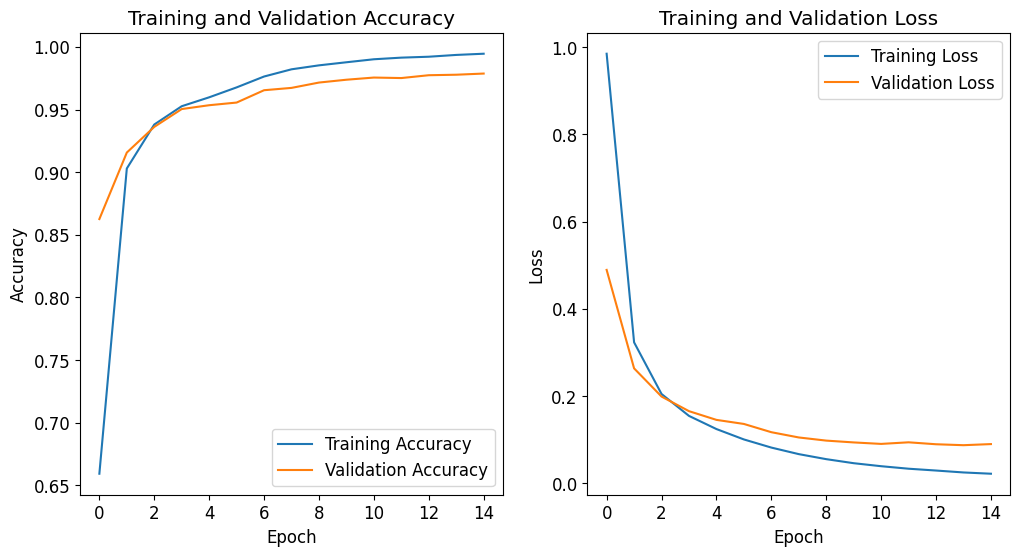

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**Confusion matrix**

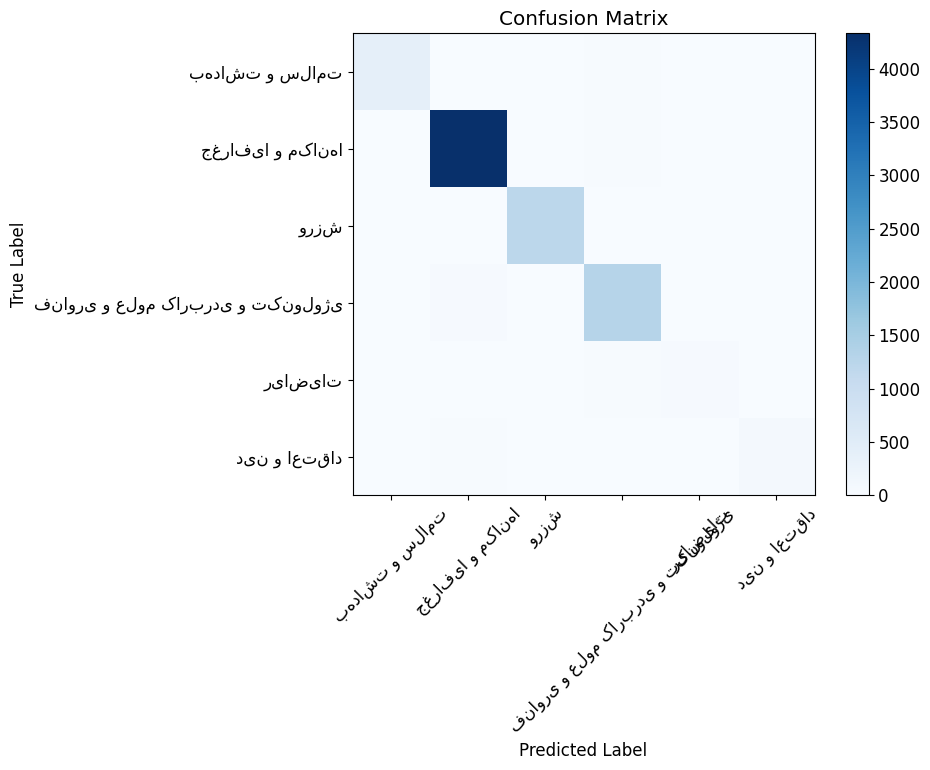

In [43]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Classification Report**

In [45]:
report = classification_report(y_val, y_pred, target_names=class_names)
print(report)

                                  precision    recall  f1-score   support

                  بهداشت و سلامت       0.96      0.94      0.95       401
                جغرافیا و مکانها       0.98      0.99      0.99      4358
                            ورزش       1.00      0.99      0.99      1232
فناوری و علوم کاربردی و تکنولوژی       0.95      0.96      0.96      1342
                         ریاضیات       0.86      0.62      0.72        81
                    دین و اعتقاد       0.86      0.74      0.80       101

                        accuracy                           0.98      7515
                       macro avg       0.94      0.87      0.90      7515
                    weighted avg       0.98      0.98      0.98      7515



**As you can see, Each F1-Score for every subject is above 0.5 which is a good thing.**